<a href="https://colab.research.google.com/github/Saswato/NETFLIX-RECOMMENDATION-SYSTEM-AND-SENTIMENTAL-ANALYSIS/blob/main/Movie_Recommendation_and_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files


## Uploading Data
#### Movie Data Set which has the data till 2016
#### You can find the link to the data set [here](https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset?select=movie_metadata.csv)

In [ ]:
uploaded = files.upload()

Saving mov_metadata.csv to mov_metadata (1).csv


In [ ]:
df = pd.read_csv( "mov_metadata.csv" )
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## Visualizing Year wise count of the data

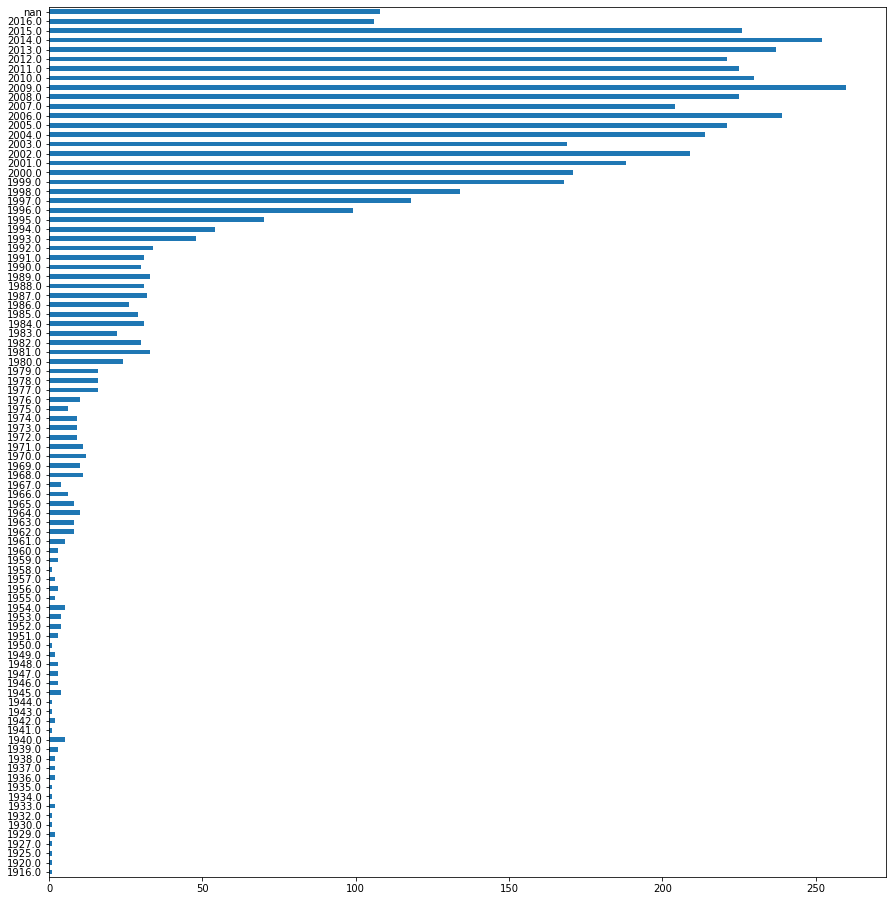

In [ ]:
import matplotlib.pyplot as plt
df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [ ]:
data = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens


### Data Cleaning and Preprocessing

In [ ]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [ ]:
data['genres'] = data['genres'].str.replace('|', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [ ]:
data['movie_title'] = data['movie_title'].str.lower()

In [ ]:
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [ ]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [ ]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

## Uploading Data related to Credit of Movies from Kaggle
### You can find the link to the dataset [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=credits.csv)

In [ ]:
uploaded = files.upload()

Saving credits.csv to credits (2).csv


In [ ]:
credits = pd.read_csv('credits.csv')

In [ ]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a3...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', ...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a92514...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', '...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': ...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gend...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': '5894a909925141427e0079a5...","[{'credit_id': '5894a97d925141426c00818c', 'department': 'Directing', '...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela', 'credit_id': '52fe4af1...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'department': 'Directing', '...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'credit_id': '52fe4776c3a368...","[{'credit_id': '52fe4776c3a368484e0c8387', 'department': 'Directing', '...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d5...","[{'credit_id': '533bccebc3a36844cf0011a7', 'department': 'Directing', '...",227506


In [ ]:
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata (2).csv


In [ ]:
meta = pd.read_csv('movies_metadata (1).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [ ]:
meta['year'] = meta['release_date'].dt.year

In [ ]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [ ]:
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [ ]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0


In [ ]:
new_meta['id'] = new_meta['id'].astype(int)

In [ ]:
data = pd.merge(new_meta, credits, on='id')

In [ ]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


### Creating functions to get genres, actors and directors

In [ ]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [ ]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [ ]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [ ]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [ ]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [ ]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [ ]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [ ]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [ ]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [ ]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [ ]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [ ]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [ ]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [ ]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [ ]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [ ]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [ ]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [ ]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [ ]:
movie = movie.dropna(how='any')

In [ ]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [ ]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [ ]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [ ]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [ ]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
data

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name,director_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend...",Action Adventure Comedy Sci-Fi,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '...",Fantasy Action Adventure,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara
...,...,...,...,...,...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '...",Romance Comedy,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Hannaleena Hauru
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge...",Crime Comedy Action Family,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Jonathan A. Rosenbaum
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend...",Family Animation Romance Comedy,NaN,NaN,NaN,Beth David Esteban Bravo
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend...",Crime Drama Thriller,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Ravi Udyawar


In [ ]:
old = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [ ]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [ ]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy|Drama
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,NaN
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama|Horror|...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy|Drama|Romance


In [ ]:
new = old.append(movie)

In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


### Extracting features of 2018 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df_new = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [ ]:
df_new

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],NaN
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],NaN
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],NaN
...,...,...,...,...,...,...,...
267,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",NaN,[164]
268,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",NaN,[137]
269,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",NaN,[228]
270,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",NaN,[260]


In [ ]:
!pip install TMDb
!pip install tmdbv3api


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '5492165c61b1a21c06eb3a3b578a6339'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " "
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [ ]:
df_new['genres'] = df_new['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_new

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],NaN,Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],NaN,Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN,Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],NaN,Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],NaN,Action Thriller Mystery
...,...,...,...,...,...,...,...,...
267,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",NaN,[164],Mystery Adventure Comedy Crime
268,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",NaN,[137],Thriller Science Fiction Action Adventure
269,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",NaN,[228],Drama History
270,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",NaN,[260],Thriller Crime Drama Action


In [ ]:
df_2018 = df_new[['Title','Cast and crew','genres']]

In [ ]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller Mystery
...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Thriller Crime Drama Action


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
meta['year'] = meta['release_date'].dt.year

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [ ]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [ ]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [ ]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [ ]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [ ]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
...,...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure C...
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Ficti...
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Thriller Crime D...


### Extracting features of 2019 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[132]
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[221]
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[222]
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[223]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2019 = df[['Title','Cast and crew','genres']]

In [ ]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Comedy Thriller
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
237,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
238,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Romance
239,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War Drama Action Thriller History
240,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [ ]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [ ]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [ ]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [ ]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Comedy Thriller,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Comedy...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
my_df = new_df18.append(new_df19,ignore_index=True)

In [ ]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
...,...,...,...,...,...,...,...
509,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
510,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
511,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
512,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
final_df = new.append(my_df,ignore_index=True)

In [ ]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
5884,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5885,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5886,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
5887,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
final_df.isna().sum()

director_name    102
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             2
movie_title        0
comb             124
dtype: int64

In [ ]:
final_df = final_df.dropna(how='any')

In [ ]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

### Extracting features of 2020 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [ ]:
import requests
import bs4 as bs
import urllib.request

In [ ]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

4

In [ ]:
type(tables[0])

bs4.element.Tag

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [ ]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2],NaN
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3],NaN
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4],NaN
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5],NaN
...,...,...,...,...,...,...,...
269,DECEMBER,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",NaN,[240]
270,DECEMBER,25,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,NaN,[241]
271,DECEMBER,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",NaN,[242]
272,DECEMBER,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",NaN,[243]


In [ ]:
df_2020 = df[['Title','Cast and crew']]

In [ ]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
270,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " "
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [ ]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Crime Thriller Drama
...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy
270,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Drama Western Adventure Action
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
270,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Drama Western Adventure Action,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [ ]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [ ]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,Inherit the Viper
...,...,...,...,...,...,...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,We Can Be Heroes
270,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Drama Western Adventure Action,News of the World
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [ ]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [ ]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      5
actor_3_name     28
genres            3
movie_title       0
comb             30
dtype: int64

In [ ]:
new_df20 = new_df20.dropna(how='any')

In [ ]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [ ]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery ...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime Thr...
...,...,...,...,...,...,...,...
268,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [ ]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
5884,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5885,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5886,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
5887,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
final_df = final_df.append(new_df20,ignore_index=True)

In [ ]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
6004,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
6005,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
6006,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6007,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [ ]:
main_df = final_df

In [ ]:
main_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
6004,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
6005,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
6006,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6007,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


### Sentiment Analysis

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Uploading movie reviews

In [ ]:
uploaded = files.upload()

Saving rev.txt to rev (1).txt


In [ ]:
dataset = pd.read_csv('rev.txt',sep = '\t', names =['Reviews','Comments'])

In [ ]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)


In [ ]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews

### Train test Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using multinomial naive bayes classifier

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

## Accuracy of the Sentiment analysis model

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [ ]:
#!pip install scikit-plot

In [ ]:
import scikitplot as skplt

import matplotlib.pyplot as plt

### Plotting the ROC - AUC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


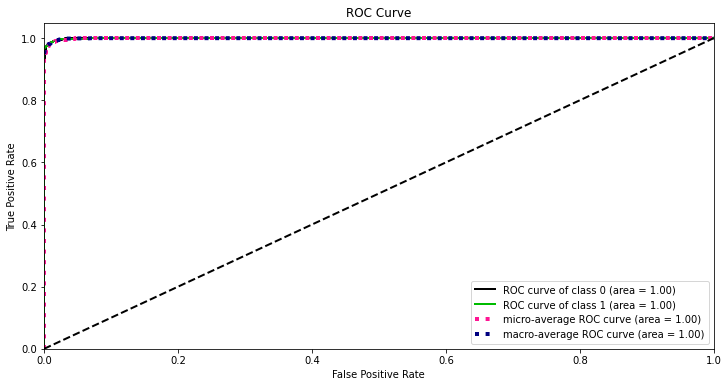

In [ ]:
Y_test_probs = clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="ROC Curve", figsize=(12,6));

We can notice from the below plot that the area covered by the ROC AUC curve line of each class is more than 99% which is good

### Plotting the Precision-Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


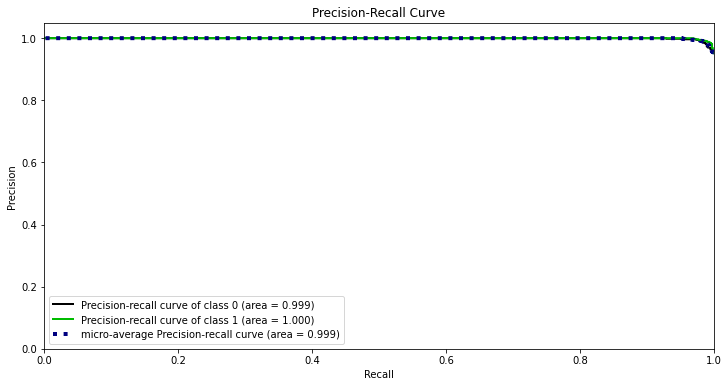

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs,
                       title="Precision-Recall Curve", figsize=(12,6));

We can notice from the below plot that the area covered by the precision-recall curve line of each class is more than 99% which is good.
We want a line of each class to cover more than 90% area so that we can be sure that our model is doing well predicting each class even in an imbalanced dataset situation.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def create_similarity(df):
    data = df
    # creating a count matrix
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(data['comb'])
    # creating a similarity score matrix
    similarity = cosine_similarity(count_matrix)
    return data,similarity

In [ ]:
a, b = create_similarity(final_df)

In [ ]:
def similarity(final_df, movie):
    # movie = request.form['name']
    rc = rcmd(final_df, movie)
    if type(rc)==type('string'):
        return rc
    else:
        m_str="---".join(rc)
        return m_str

In [ ]:
def rcmd(data, m):

    data, similarity = create_similarity(data)



    i = data.loc[data['movie_title']==m].index[0]

    # i = final_df[final_df['movie_title'] == 'Avatar\xa0'].index[0]
    lst = list(enumerate(similarity[i]))
    lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
    lst = lst[1:5] # excluding first item since it is the requested movie itself
    l = []
    for i in range(len(lst)):
      a = lst[i][0]
      l.append(data['movie_title'][a])
    return l


In [ ]:
similarity(final_df,"Avatar\xa0")

'Aliens\xa0---Mystery Men\xa0---Deep Rising\xa0---Dragonball: Evolution\xa0'

In [ ]:
recommed_movies = rcmd(final_df,"Spectre\xa0" )

In [ ]:
recommended_movies = []
for i in recommed_movies:
  recommended_movies.append(i.replace('\xa0',''))


In [ ]:
api_key = '5492165c61b1a21c06eb3a3b578a6339'

## Testing the model

#### Let us take the movie 'Spectre' as an example and check for the model's performance

In [ ]:
m = 'Spectre'

In [ ]:
!pip install imdbpy
import imdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Here we find the IMDB ID of the movie

In [ ]:
# creating instance of IMDb
ia = imdb.IMDb()
search = ia.search_movie(m)
imdb_id = 'tt' + str(search[0].movieID)
print(imdb_id)

tt2379713


#### Checking for reviews from IMDB and classifying them as Good or Bad

In [ ]:
sauce = urllib.request.urlopen('https://www.imdb.com/title/{}/reviews?ref_=tt_ov_rt'.format(imdb_id)).read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("div",{"class":"text show-more__control"})

In [ ]:
reviews_list = [] # list of reviews
reviews_status = [] # list of comments (good or bad)
for reviews in soup_result:
  if reviews.string:
    reviews_list.append(reviews.string)
    # passing the review to our model
    movie_review_list = np.array([reviews.string])
    movie_vector = vectorizer.transform(movie_review_list)
    pred = clf.predict(movie_vector)
    reviews_status.append('Good' if pred else 'Bad')

# combining reviews and comments into a dictionary
movie_reviews = {reviews_list[i]: reviews_status[i] for i in range(len(reviews_list))}

In [ ]:
from collections import Counter

## The result of Sentimental Analysis

In [ ]:
count = Counter(movie_reviews.values())
print(count)
json_object = json.dumps(movie_reviews, indent =1)
print(json_object)

Counter({'Bad': 4, 'Good': 2})
{
 "SPECTRE (2015) ***1/2 Daniel Craig, Christoph Waltz, Lea Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie Harris, Dave Bautista, Andrew Scott, Jasper Christensen, Alessandro Cremona, Stephanie Sigman (cameo: Judi Densch) Craig continues to prosper as James Bond (in possibly his swan song turn as 007 if rumor has it) and does so with a bang: out to avenge the recently departed M as well as confront the nefarious leader of the titular conspiracy group hellbent on sabotaging international security at any cost. Waltz is slimily evil as the notorious Blofeld and a continuing supporting crew for Bond including aces-up-his-sleeve Fiennes as the new M, spunky and sexy Harris as Moneypenny and crafty Whishaw as Q. Bautista's near mute turn as a brute echoing Robert Shaw's blond Russian thug of \"From Russia With Love\" and Richard Kiel's Jaws from Roger Moore's pair of flicks is indeed formidable and chilling. While there is little believable chemi

### The top 3 movie recommendations

In [ ]:
for i in recommended_movies:
  print(i.replace("/xa0",""))

Skyfall
Quantum of Solace
The Legend of Tarzan
alita: battle angel


# FIN.